# Matriz inicial 20*20

individuo=1
individuo=2
individuo=3
individuo=4
individuo=5
individuo=6
individuo=7
individuo=8
individuo=9
individuo=10
individuo=11
individuo=12
individuo=13
individuo=14
individuo=15


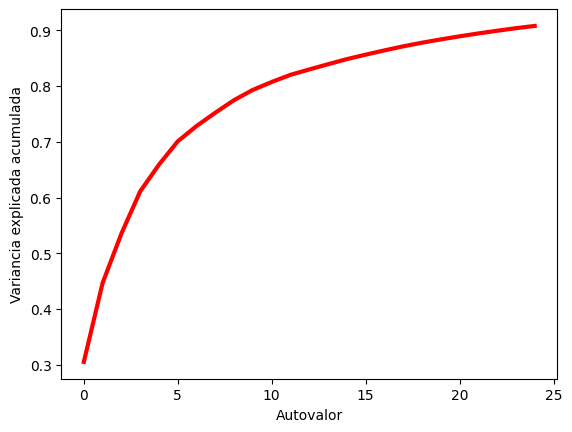


Processo concluído. Arquivo 'recfaces.dat' salvo.


In [ ]:
# -*- coding: utf-8 -*-
# % Routines for opening face images and convert them to column vectors
# % by stacking the columns of the face matrix one beneath the other.
# %
# % Last modification: 10/08/2021
# % Author: Guilherme Barreto

import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# As funções clear, clc, close all e pkg load image são específicas do ambiente MATLAB/Octave
# e não têm tradução direta ou necessária em um script Python padrão.

#####################################################
# % Fase 1 -- Carrega imagens disponiveis
#####################################################
part1 = 'subject0'
part2 = 'subject'
part3 = ['.centerlight', '.glasses', '.happy', '.leftlight', '.noglasses', '.normal', '.rightlight', '.sad', '.sleepy', '.surprised', '.wink']
# A função strvcat não é necessária em Python, a lista 'part3' já serve ao propósito.

Nind = 15   # % Quantidade de individuos (classes)
Nexp = len(part3)  # % Quantidade de expressoes

X = []  # % Matriz que acumula imagens vetorizadas
Y = []  # % Matriz que acumula o rotulo (identificador) do individuo
# Z e NAME são inicializados mais tarde ou não são usados da mesma forma.

# Loop principal para carregar e processar as imagens
for i in range(1, Nind + 1):  # % Indice para os individuos
    print(f"individuo={i}") # Equivalente a 'individuo=i' no MATLAB para mostrar o progresso
    for j in range(Nexp):   # % Indice para expressoes
        if i < 10:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part1}{i}{part3[j]}"
        else:
            # % Monta o nome do arquivo de imagem
            nome_base = f"{part2}{i}{part3[j]}"

        # Lógica para encontrar o arquivo de imagem na pasta 'images'
        # O código original não especifica a extensão, então vamos procurar por algumas comuns.
        file_path = None
        for ext in ['','.gif', '.pgm', '.jpg', '.png', '.jpeg']:
            potential_path = os.path.join('images', nome_base + ext)
            if os.path.exists(potential_path):
                file_path = potential_path
                break

        if not file_path:
            print(f"Aviso: Imagem para '{nome_base}' não encontrada. Pulando.")
            continue

        Img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)  # % le imagem

        Ar = cv2.resize(Img, (20, 20))   # % (Opcional) Redimensiona imagem

        An = Ar # % An=imnoise(Ar,'gaussian',0,0.005);  # (Opcional) adiciona ruido

        A = An.astype(np.float64) / 255.0  # % converte (im2double) para double precision

        a = A.flatten('F')  # % Etapa de vetorizacao: Empilhamento das colunas

        # %ROT=zeros(Nind,1); ROT(i)=1;  # Cria rotulo da imagem (binario {0,1}, one-hot encoding)
        # %ROT=strcat(part1,int2str(i));
        # %ROT=-ones(Nind,1); ROT(i)=1;  # Cria rotulo da imagem (bipolar {-1,+1})
        ROT = i   # % Rotulo = indice do individuo

        X.append(a) # % Coloca cada imagem vetorizada como coluna da matriz X (aqui, como linha de uma lista)
        Y.append(ROT) # % Coloca o rotulo de cada vetor como coluna da matriz Y (aqui, como item de uma lista)

# Convertendo as listas para arrays NumPy e ajustando as dimensões para corresponder ao MATLAB
X = np.array(X).T  # Transpõe para que cada coluna seja uma imagem
Y = np.array(Y)    # Y já está no formato correto (1D array)

# %%%%%%%% APLICACAO DE PCA (PCACOV) %%%%%%%%%%%
# A abordagem em Python usando Scikit-learn é um pouco diferente, mas alcança o mesmo resultado.
# Scikit-learn espera dados com amostras por linha, então transpomos X.
cov_matrix = np.cov(X) # Equivalente a cov(X') do MATLAB, pois X aqui já está transposto.
pca_skl = PCA() # Inicializa o PCA
pca_skl.fit(X.T) # Ajusta o PCA aos dados (amostras por linha)

# [V L VEi]=pcacov(cov(X'));
V = pca_skl.components_.T # Autovetores (componentes principais), como colunas
VEi = pca_skl.explained_variance_ratio_ # Variância explicada por cada componente

q = 25 # Número de componentes a manter
Vq = V[:, :q] # % Vq=V(:,1:q);
Qq = Vq.T # % Qq=Vq';
X = Qq @ X # % X=Qq*X; (usando @ para multiplicação de matrizes)

VEq = np.cumsum(VEi) # % VEq=cumsum(VEi);
plt.figure() # % figure;
plt.plot(VEq[:q], 'r-', linewidth=3) # % plot(VEq,'r-','linewidth',3); (plotamos até q componentes)
plt.xlabel('Autovalor') # % xlabel('Autovalor');
plt.ylabel('Variancia explicada acumulada') # % ylabel('Variancia explicada acumulada');
plt.show()

Z = np.vstack([X, Y])  # % Z=[X;Y];  # Formato 01 vetor de atributos por coluna: DIM(Z) = (p+1)xN
Z = Z.T     # % Z=Z';     # Formato 01 vetor de atributos por linha: DIM(Z) = Nx(p+1)

np.savetxt('recfaces400PCA.dat', Z, fmt='%f') # % save -ascii recfaces.dat Z

# %save -ascii yale1_input20x20.txt X
# %save -ascii yale1_output20x20.txt Y

print("\nProcesso concluído. Arquivo 'recfaces400PCA.dat' salvo.")